In [85]:
def collatz_next(n):
    if n%2 == 0:
        return n//2
    return 3*n+1

def collatz_previous(n):
    if n%6 == 4:
        return [n*2, (n-1)//3]
    return [n*2]

# def collatz_all_previous(n_list):
#     result = []
#     for n in n_list:
#         result = result.extend(collatz_previous(n))

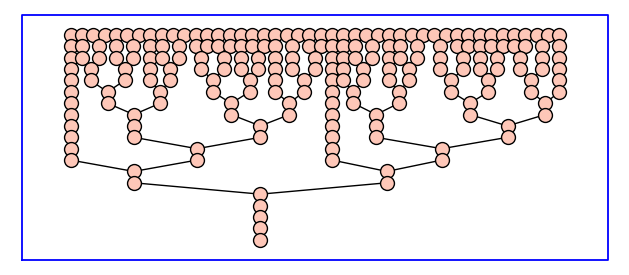

In [95]:
# just making the collatz graph in layers from 1
G = Graph()
G.add_vertex(1)
leaves = [1]

for layer in range(18):
    added_vertices = []
    for vertex in leaves:
        new_vertices = collatz_previous(vertex)
        G.add_vertices(new_vertices)
        G.add_edges([(new_vertex, vertex) for new_vertex in new_vertices])
        added_vertices.extend(new_vertices)
    
    if 1 in added_vertices:
        added_vertices.remove(1)
    leaves = added_vertices

G.delete_edge(1, 4)

G.plot(layout="tree", tree_root=1, tree_orientation="up", 
       vertex_labels=False, vertex_size=100, 
       graph_border=True, figsize=[6.4, 4.8]).show()

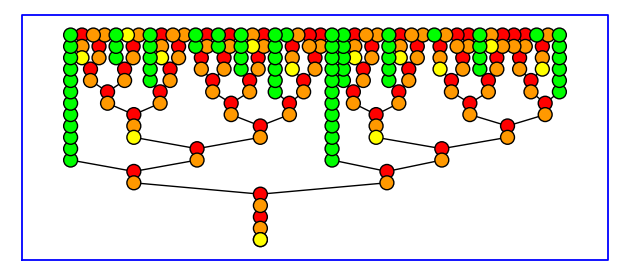

In [96]:
# coloring based on residue mod 6
G = Graph()
G.add_vertex(1)
leaves = [1]

red = "#FF0000"
orange = "#FF9900"
yellow = "#FFFF00"
green = "#00FF00"
color_classes = {0: green, 1: yellow, 2: orange, 3: green, 4: red, 5: orange}
vertex_colors = {red: [], orange: [], yellow: [1], green: []}

for layer in range(18):
    added_vertices = []
    for vertex in leaves:
        new_vertices = collatz_previous(vertex)
        G.add_vertices(new_vertices)
        G.add_edges([(new_vertex, vertex) for new_vertex in new_vertices])
        added_vertices.extend(new_vertices)
        
        for new_vertex in new_vertices:
            this_color = color_classes[new_vertex % 6]
            vertex_colors[this_color].append(new_vertex)
    
    if 1 in added_vertices:
        added_vertices.remove(1)
    leaves = added_vertices

G.delete_edge(1, 4)

G.plot(layout="tree", tree_root=1, tree_orientation="up", 
       vertex_labels=False, vertex_size=100, vertex_colors = vertex_colors, 
       graph_border=True, figsize=[6.4, 4.8]).show()

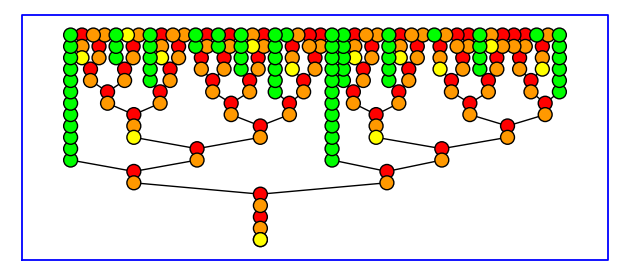

layer 0: count 1
layer 1: count 1
layer 2: count 1
layer 3: count 1
layer 4: count 1
layer 5: count 2
layer 6: count 2
layer 7: count 4
layer 8: count 4
layer 9: count 6
layer 10: count 6
layer 11: count 8
layer 12: count 10
layer 13: count 14
layer 14: count 18
layer 15: count 24
layer 16: count 29
layer 17: count 36
layer 18: count 44


In [99]:
# coloring based on mod 6 and examining layers
G = Graph()
G.add_vertex(1)
leaves = [1]

red = "#FF0000"
orange = "#FF9900"
yellow = "#FFFF00"
green = "#00FF00"
color_classes = {0: green, 1: yellow, 2: orange, 3: green, 4: red, 5: orange}
vertex_colors = {red: [], orange: [], yellow: [1], green: []}

vertex_layers = {0: [1]}

for layer in range(18):
    added_vertices = []
    for vertex in leaves:
        new_vertices = collatz_previous(vertex)
        G.add_vertices(new_vertices)
        G.add_edges([(new_vertex, vertex) for new_vertex in new_vertices])
        added_vertices.extend(new_vertices)
        
        for new_vertex in new_vertices:
            this_color = color_classes[new_vertex % 6]
            vertex_colors[this_color].append(new_vertex)
    
    if 1 in added_vertices:
        added_vertices.remove(1)
    vertex_layers[layer+1] = added_vertices
    leaves = added_vertices

G.delete_edge(1, 4)

G.plot(layout="tree", tree_root=1, tree_orientation="up", 
       vertex_labels=False, vertex_size=100, vertex_colors = vertex_colors, 
       graph_border=True, figsize=[6.4, 4.8]).show()

for layer in sorted(vertex_layers.keys()):
    print(f"layer {layer}: count {len(vertex_layers[layer])}")

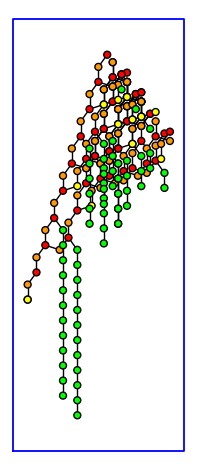

In [144]:
# coloring based on mod 6 and specifying coordinates
G = Graph()
G.add_vertex(1)
leaves = [1]
vertex_coords = {1: (0, 0)}

red = "#FF0000"
orange = "#FF9900"
yellow = "#FFFF00"
green = "#00FF00"
color_classes = {0: green, 1: yellow, 2: orange, 3: green, 4: red, 5: orange}
vertex_colors = {red: [], orange: [], yellow: [1], green: []}

for layer in range(18):
    added_vertices = []
    for vertex in leaves:
        new_vertices = collatz_previous(vertex)
        G.add_vertices(new_vertices)
        G.add_edges([(new_vertex, vertex) for new_vertex in new_vertices])
        added_vertices.extend(new_vertices)
        
        for idx, new_vertex in enumerate(new_vertices):
            if new_vertex % 6 == 0:
                x_change = 0
                y_change = -1
            elif new_vertex % 6 == 1:
                x_change = 0.9511
                y_change = 0.3090
            elif new_vertex % 6 == 2:
                x_change = 0
                y_change = 1
            elif new_vertex % 6 == 3:
                x_change = 0.5878
                y_change = -0.8090
            elif new_vertex % 6 == 4:
                x_change = 0.5878
                y_change = 0.8090
            elif new_vertex % 6 == 5:
                x_change = 0.9511
                y_change = -0.3090
            
            up_bool = (idx == 1)
            right_bool = (not up_bool)
            vertex_coords[new_vertex] = (vertex_coords[vertex][0]+x_change, vertex_coords[vertex][1]+y_change)
            this_color = color_classes[new_vertex % 6]
            vertex_colors[this_color].append(new_vertex)
    
    if 1 in added_vertices:
        added_vertices.remove(1)
    leaves = added_vertices

vertex_coords[1] = (0, 0)
G.delete_edge(1, 4)

G.plot(pos=vertex_coords, vertex_labels=False, vertex_size=25, 
       vertex_colors = vertex_colors, graph_border=True, figsize=[6.4, 4.8]).show()

In [93]:
list(enumerate(["first", "second"]))

[(0, 'first'), (1, 'second')]

In [1]:
import numpy

In [2]:
import networkx